<a href="https://colab.research.google.com/github/AbhinavShakunt/MY_Data_Science_Notebooks/blob/main/Gpu_benchmarcking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

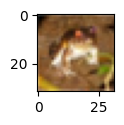

In [ ]:
plot_sample(0)

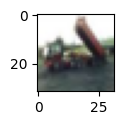

In [ ]:
plot_sample(2)

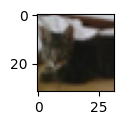

In [ ]:
plot_sample(9)

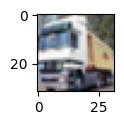

In [ ]:
plot_sample(1)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

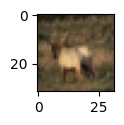

In [ ]:
plot_sample(3)

In [ ]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [ ]:
y_test.shape


(10000, 1)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
classes[y_train[3][0]]

'deer'

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32')
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)


In [ ]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8140 - accuracy: 0.3536
Epoch 2/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6256 - accuracy: 0.4272
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5452 - accuracy: 0.4544
Epoch 4/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4838 - accuracy: 0.4765
Epoch 5/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4320 - accuracy: 0.4976
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3907 - accuracy: 0.5089
Epoch 7/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3505 - accuracy: 0.5269
Epoch 8/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3189 - accuracy: 0.5357
Epoch 9/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2838 - accuracy: 0.5482
Epoch 10/100
1563/1563 [==============================] - 8s 5ms/step -

In [ ]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 1s 2ms/step


3

In [ ]:
classes[y_test[1][0]]

'ship'

In [ ]:
model.predict(X_test_scaled)[0]

313/313 [==============================] - 1s 2ms/step


array([1.8583880e-01, 9.7703958e-01, 9.5686144e-01, 9.9999821e-01,
       9.7603899e-01, 2.6138124e-01, 1.6353795e-03, 1.6638803e-06,
       8.0988061e-01, 4.2317012e-01], dtype=float32)

In [ ]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 1s 2ms/step


'cat'

In [ ]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 123s 78ms/step - loss: 1.8159 - accuracy: 0.3517
2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 9s 5ms/step - loss: 1.8122 - accuracy: 0.3563
12.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 124s 79ms/step - loss: 1.8082 - accuracy: 0.3562
Epoch 2/10
1563/1563 [==============================] - 123s 79ms/step - loss: 1.6233 - accuracy: 0.4254
Epoch 3/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.5411 - accuracy: 0.4546
Epoch 4/10
1563/1563 [==============================] - 122s 78ms/step - loss: 1.4817 - accuracy: 0.4790
Epoch 5/10
1563/1563 [==============================] - 124s 79ms/step - loss: 1.4320 - accuracy: 0.4949
Epoch 6/10
1563/1563 [==============================] - 122s 78ms/step - loss: 1.3904 - accuracy: 0.5114
Epoch 7/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.3502 - accuracy: 0.5235
Epoch 8/10
1563/1563 [==============================] - 124s 80ms/step - loss: 1.3169 - accuracy: 0.5370
Epoch 9/10
1563/1563 [==============================] - 126s 80ms/step - loss: 1.2851 - accuracy: 0.5495
Epoch 10/10
1563/1563 [==============================] 

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.8150 - accuracy: 0.3520
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6256 - accuracy: 0.4259
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5433 - accuracy: 0.4560
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4821 - accuracy: 0.4788
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4350 - accuracy: 0.4953
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3911 - accuracy: 0.5128
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3521 - accuracy: 0.5252
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3202 - accuracy: 0.5363
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2867 - accuracy: 0.5479
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.25